# PS1 Data
Authors
- David W Hogg (NYU)
- Clark Miyamoto (NYU)

Requirements:
- `astropy`

# Get the Labels

In [15]:
import numpy as np
from astropy.io import fits # You might need to pip install this
import pylab as plt # only needed for verification

In [ ]:
hdul = fits.open("labels.fits")


Filename: labels.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU    399   733901R x 191C   [30A, 6A, 20A, 30A, D, D, D, D, E, E, E, E, E, E, E, 32A, E, E, J, J, J, J, J, J, 132A, 32A, 32A, J, E, E, K, 132A, K, 132A, E, E, E, E, E, E, E, E, E, E, E, J, J, E, E, E, E, E, E, K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 8A, E, 9K, K, 256A, E, E, E, 27E, 27E, 27E, 27E, 27E, 27E, J, K, 10A, 27E, 27E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J, E, E, E, J]   
  2                1 ImageHDU         6   (360,)   int64   
  3                1 BinTableHDU     26   1R x 6C   [7514E, 576A, 540A, 27J, 1296A, 420A]   
  4                1 BinTableHD

AttributeError: 'HDUList' object has no attribute 'data'

In [5]:
path_labels = "./labels.fits"
allstar = fits.open(path_labels)

(5.0, 0.0)

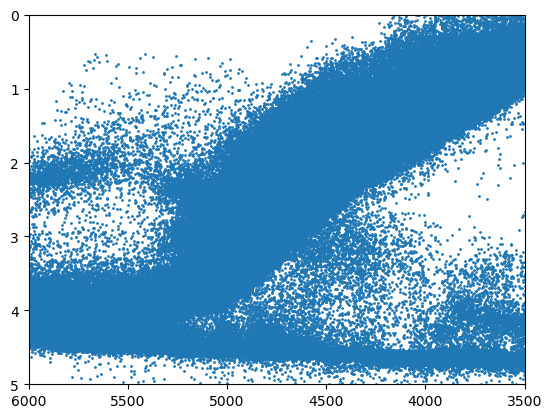

In [6]:
# the labels are in an enormous table in element [1] of this FITS file
labels = allstar[1].data
plt.scatter(labels['TEFF'], labels['LOGG'], s=1)
plt.xlim(6000, 3500)
plt.ylim(5, 0)

In [7]:
# make a reasonable red-giant-branch sample
RGB = True
RGB = np.logical_and(RGB, labels['TEFF'] > 3500.)
RGB = np.logical_and(RGB, labels['TEFF'] < 5400.)
RGB = np.logical_and(RGB, labels['LOGG'] < 3.0)
RGB = np.logical_and(RGB, labels['LOGG'] > 0.0)
RGB = np.logical_and(RGB, labels['H'] < 10.5)
print(np.sum(RGB))

145991


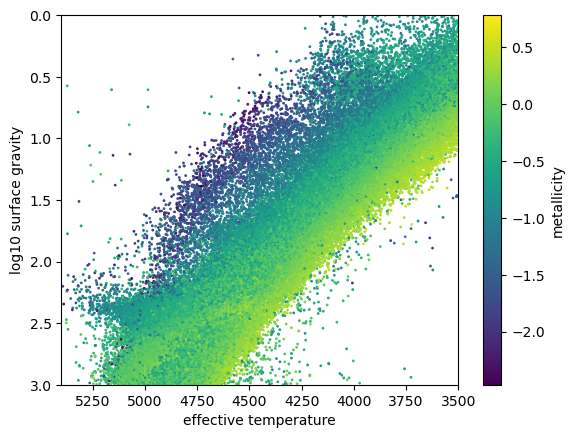

In [9]:
# make a plot that an astronomer likes to see
RGB_labels = labels[RGB]
plt.scatter(RGB_labels['TEFF'], RGB_labels['LOGG'], c=RGB_labels['FE_H'], s=1)
plt.xlim(5400, 3500)
plt.xlabel("effective temperature")
plt.ylim(3., 0.)
plt.ylabel("log10 surface gravity")
plt.colorbar(label="metallicity")

In [36]:
# make train, validation, and test data sets
rng = np.random.default_rng(17)
N_RGB = len(RGB_labels)
N_train, N_valid, N_test = 1024, 256, 512
I = rng.permutation(N_RGB)
I_train = I[0:N_train]
I_valid = I[N_train:N_train+N_valid]
I_test = I[N_train+N_valid:N_train+N_valid+N_test]

train_labels = RGB_labels[I_train]
valid_labels = RGB_labels[I_valid]
test_labels = RGB_labels[I_test]
print(len(train_labels), len(valid_labels), len(test_labels))

1024 256 512


In [43]:
train_labels[0]

('2M05282261-6908287', 'lco25m', '30Dor', 'none', np.float64(82.094231), np.float64(-69.141312), np.float64(279.65967016748186), np.float64(-32.57819471348452), np.float32(9.275), np.float32(0.091), np.float32(8.15), np.float32(0.036), np.float32(7.796), np.float32(0.026), np.float32(nan), 'none', np.float32(0.7518415), np.float32(0.5291884), np.int32(0), np.int32(0), np.int32(0), np.int32(-2146959360), np.int32(0), np.int32(0), 'APOGEE2_COMMIS_SOUTH_SPEC', 'apogee2s', 'halo', np.int32(1), np.float32(251.74564), np.float32(264.86063), np.int64(0), '', np.int64(0), '', np.float32(267.62988), np.float32(0.0), np.float32(0.038580444), np.float32(3770.2532), np.float32(0.6031771), np.float32(-0.46269518), np.float32(0.0), np.float32(0.0), np.float32(28.305626), np.float32(22.40921), np.float32(12.347154), np.int32(0), np.int32(1), np.float32(250.0), np.float32(0.0), np.float32(-9999.99), np.float32(9999.99), np.float32(-9999.99), np.float32(9999.99), np.int64(4658058264937692032), np.float

Here how you get `LOGG`

In [37]:
train_labels_logg = train_labels['LOGG']
print(train_labels_logg.shape) # (num_spectra, 1)

(1024,)


# Get the Features

In [38]:
import numpy as np
from matplotlib import pyplot as plt

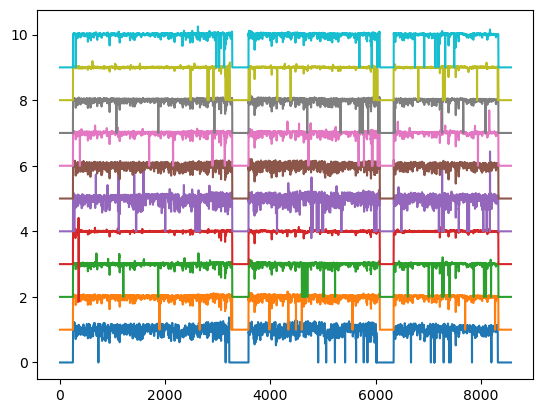

In [39]:
train_features = np.load('./train_features.npy')
valid_features = np.load('./valid_features.npy')
test_features = np.load('./test_features.npy')
for i in range(10):
    plt.plot(train_features[i] + i)

In [40]:
print(train_features.shape) # (num_spectra, num_pixels)

(1024, 8575)


____

# If you want to download more data

Run the `Get Labels` section, and then run this!

Adjust `N_train`, `N_valid`, and `N_test`.

In [ ]:
# make train, validation, and test data sets
rng = np.random.default_rng(17)
N_RGB = len(RGB_labels)
N_train, N_valid, N_test = 1024, 256, 512 # <- Adjust these for more data! 
I = rng.permutation(N_RGB)
I_train = I[0:N_train]
I_valid = I[N_train:N_train+N_valid]
I_test = I[N_train+N_valid:N_train+N_valid+N_test]
train_labels = RGB_labels[I_train]
valid_labels = RGB_labels[I_valid]
test_labels = RGB_labels[I_test]
print(len(train_labels), len(valid_labels), len(test_labels))

In [ ]:
base_url = "https://data.sdss.org/sas/dr17/apogee/spectro/aspcap/dr17/synspec_rev1/"
def get_features(labels):
    features = None
    for l in labels:
        url = base_url + l['TELESCOPE'] + "/" + l['FIELD'] + "/aspcapStar-dr17-" + l['APOGEE_ID'] + ".fits"
        x = fits.open(url)[1].data
        if features is None:
            features = x[None, :]
        else:
            features = np.concatenate((features, x[None, :]), axis=0)
    return features

In [ ]:
# Downloads data from SDSS
# This will take a while, the first time you run it. Don't be alarmed.
train_features_downloaded = get_features(train_labels)
valid_features_downloaded = get_features(valid_labels)
test_features_downloaded = get_features(test_labels)
print(train_features_downloaded.shape, valid_features_downloaded.shape, test_features_downloaded.shape)